## web scraping: Liverpool FC - Team
#### use BeautifulSoup4 (using CSS selectors style)
* web: https://www.liverpoolfc.com/team/first-team
* Soup Sieve API: https://facelessuser.github.io/soupsieve/api/
* BeautifulSoup doc: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

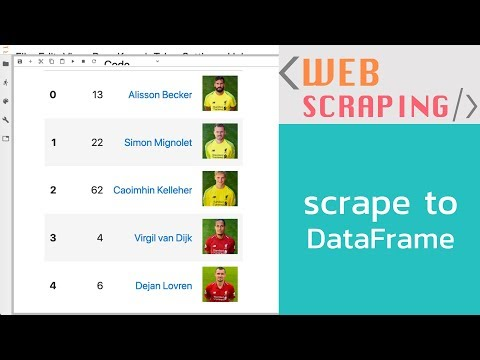

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y-_t5Hll09I', width=720, height=405)

In [2]:
# conda install beautifulsoup4 lxml requests pillow
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image # pillow package (Python Image Library)
import io

In [3]:
print(f'pandas version = {pd.__version__}')
print(f'bs4    version = {bs4.__version__}') # beautifulsoup4

pandas version = 1.2.1
bs4    version = 4.9.3


In [4]:
pd.Timestamp.today()

Timestamp('2021-02-13 10:19:35.110649')

In [5]:
# url='https://www.liverpoolfc.com/team/first-team'
url='https://github.com/prasertcbs/basic-dataset/raw/master/html_pages/liverpoolfc.html'
r=requests.get(url)
r.text[:100]

'<html id="top" class="js"><!--<![endif]--><head><script type="text/javascript" async="" src="//app.m'

In [6]:
# s = BeautifulSoup(r.text, 'html.parser')
s = BeautifulSoup(r.text, 'lxml')
type(s)

bs4.BeautifulSoup

In [7]:
# print(s.prettify())

In [8]:
# CSS selector
el=s.select('li.team-player-list-item')
print(len(el))

39


In [9]:
el[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [10]:
el[1]

<li class="team-player-list-item">
<a href="/team/first-team/player/adrian">
<div class="img-wrap">
<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Adrian</span>
</div>
</div>
</a>
</li>

In [11]:
e=el[1]
print(e.prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/adrian">
  <div class="img-wrap">
   <img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   13
  </div>
  <div class="about">
   <div class="name">
    <span>
     Adrian
    </span>
   </div>
  </div>
 </a>
</li>



In [12]:
e.select_one('div.number').text

'13'

In [13]:
e.select_one('div.name').text

'\nAdrian\n'

In [14]:
e.select_one('div.img-wrap')

<div class="img-wrap">
<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg"/>
</div>

In [15]:
e.select_one('div.img-wrap>img')

<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg"/>

In [16]:
e.select_one('div.img-wrap>img') # attributes

<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg"/>

In [17]:
e.select_one('div.img-wrap>img')['alt'] # attributes

'Adrian'

In [18]:
e.select_one('div.img-wrap>img')['src'] # attributes

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg'

In [19]:
rows=[] # list
for e in el:
    name=e.select_one('div.img-wrap>img')['alt'] # attributes
    number=e.select_one('div.number').text
    img_url=e.select_one('div.img-wrap>img')['src'] # attributes
#     print(name, number, img_url)
    rows.append((name, number, img_url))
rows[:2]

[('Alisson Becker',
  '1',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113591_misc_general_500.jpeg'),
 ('Adrian',
  '13',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/14/thumb_113604_misc_general_500.jpeg')]

In [20]:
df=pd.DataFrame(rows[:], columns=['name', 'number', 'img_url'])
df

,name,number,img_url
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
3,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
5,Joe Gomez,12,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
6,Ozan Kabak,19,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
7,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...
9,Ben Davies,28,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...


In [29]:
df.to_csv('liverpool.csv', index=False)
df.to_excel('liverpool.xlsx', index=False)

---

In [22]:
from IPython.display import HTML

In [23]:
def to_html_img(url, alt=None, width=100):
    '''
    add img tag to url
    '''
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

def save_img(content, imgfilename):
    '''
    save image to file
    '''
    with open(imgfilename, 'wb') as f:
        f.write(content)
        
def download_img(url, imgfilename=None):
    '''
    download image from url
    '''
    r=requests.get(url)
    if imgfilename==None:
        imgfilename = f'{str(uuid.uuid1())[:8]}.png'
    save_img(r.content, imgfilename)
    print(f'{imgfilename} saved')

In [28]:
df.apply(lambda r: download_img(r['img_url'], f"{r['name']}.jpg"), axis=1)

Alisson Becker.jpg saved
Adrian.jpg saved
Caoimhin Kelleher.jpg saved
Marcelo Pitaluga.jpg saved
Virgil van Dijk.jpg saved
Joe Gomez.jpg saved
Ozan Kabak.jpg saved
Kostas Tsimikas.jpg saved
Andy Robertson.jpg saved
Ben Davies.jpg saved
Joel Matip.jpg saved
Rhys Williams.jpg saved
Nathaniel Phillips.jpg saved
Trent Alexander-Arnold.jpg saved
Neco Williams.jpg saved
Fabinho.jpg saved
Georginio Wijnaldum.jpg saved
Thiago Alcantara.jpg saved
James Milner.jpg saved
Naby Keita.jpg saved
Jordan Henderson.jpg saved
Alex Oxlade-Chamberlain.jpg saved
Curtis Jones.jpg saved
Xherdan Shaqiri.jpg saved
Ben Woodburn.jpg saved
Roberto Firmino.jpg saved
Sadio Mane.jpg saved
Mohamed Salah.jpg saved
Diogo Jota.jpg saved
Divock Origi.jpg saved
Marko Grujic.jpg saved
Takumi Minamino.jpg saved
Loris Karius.jpg saved
Sheyi Ojo.jpg saved
Harry Wilson.jpg saved
Harvey Elliott.jpg saved
Sepp van den Berg.jpg saved
Kamil Grabara.jpg saved
Taiwo Awoniyi.jpg saved


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
dtype: object

In [24]:
to_html_img('https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg')

'<img alt="" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0001/70/thumb_69996_misc_general_500.jpeg" width="100"/>'

In [25]:
df['img']=df.apply(lambda r: to_html_img(r['img_url'], r['name'], 100), axis=1)
df.head()

,name,number,img_url,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img alt=""Alisson Becker"" src=""https://d3j2s6h..."
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img alt=""Adrian"" src=""https://d3j2s6hdd6a7rg...."
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img alt=""Caoimhin Kelleher"" src=""https://d3j2..."
3,Marcelo Pitaluga,,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img alt=""Marcelo Pitaluga"" src=""https://d3j2s..."
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploa...,"<img alt=""Virgil van Dijk"" src=""https://d3j2s6..."


In [26]:
HTML(df[:5][['name', 'number', 'img']].to_html(escape=False))

,name,number,img
0,Alisson Becker,1,
1,Adrian,13,
2,Caoimhin Kelleher,62,
3,Marcelo Pitaluga,,
4,Virgil van Dijk,4,


---